In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

def filtering_func(freqs, fft, f1, f2): #passing complex numbers
    n = max(np.abs(fft))
    filtered_fft = fft.copy() #in this way it doesn't reference to fft

    fft_in_range = np.abs(fft[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)])
    print(f'fft_in_range: {fft_in_range/n} ')

    peak = np.max(fft_in_range)

    peak_indices = np.where(fft_in_range == peak)[0]
    print(f"peak_indices: {peak_indices}")

    print(f"fft[peak_indices]: {fft_in_range[peak_indices]/n}")

    peak_f = freqs[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)][peak_indices]
    print(f"peak_f: {peak_f}")

    fft_in_range[peak_indices] = np.nan
    range_avg = np.nanmean(fft_in_range) #compute the mean excluding the point you are filtering
    print(f'range_avg: {range_avg/n}')

    print(f'sum: {np.sum(np.isin(freqs, peak_f))}') #make sure you are filtering only 1 frequency
    filtered_fft[np.isin(freqs, peak_f)] = complex(range_avg, 0)
    range_avg = range_avg/n
    return filtered_fft, range_avg, peak_f

In [2]:
mint = 0
maxt = 10
N = 50000
step = ( maxt - mint )/N
times = np.arange(0, 10, step)
print(times)
print(f"len(times): {len(times)}")

f_s = N/maxt
print(f"f_s = {f_s} = 1/step = {1/step}")

#amplitudes1 = np.sin(5 * 2*np.pi * times + np.pi/2) 
#np.pi/2 is necessary for the fft bc it uses cos
amplitudes1 = 10*np.sin(5 * 2*np.pi * times +np.pi/4)
#subtracting 2 things that are off by a phase
amplitudes2 = 4*np.sin(3 * 2*np.pi * times +np.pi/7) 
amplitudes = amplitudes2 + amplitudes1

amplitudes = amplitudes
amplitudes1 = amplitudes1
amplitudes2 = amplitudes2

[0.0000e+00 2.0000e-04 4.0000e-04 ... 9.9994e+00 9.9996e+00 9.9998e+00]
len(times): 50000
f_s = 5000.0 = 1/step = 5000.0


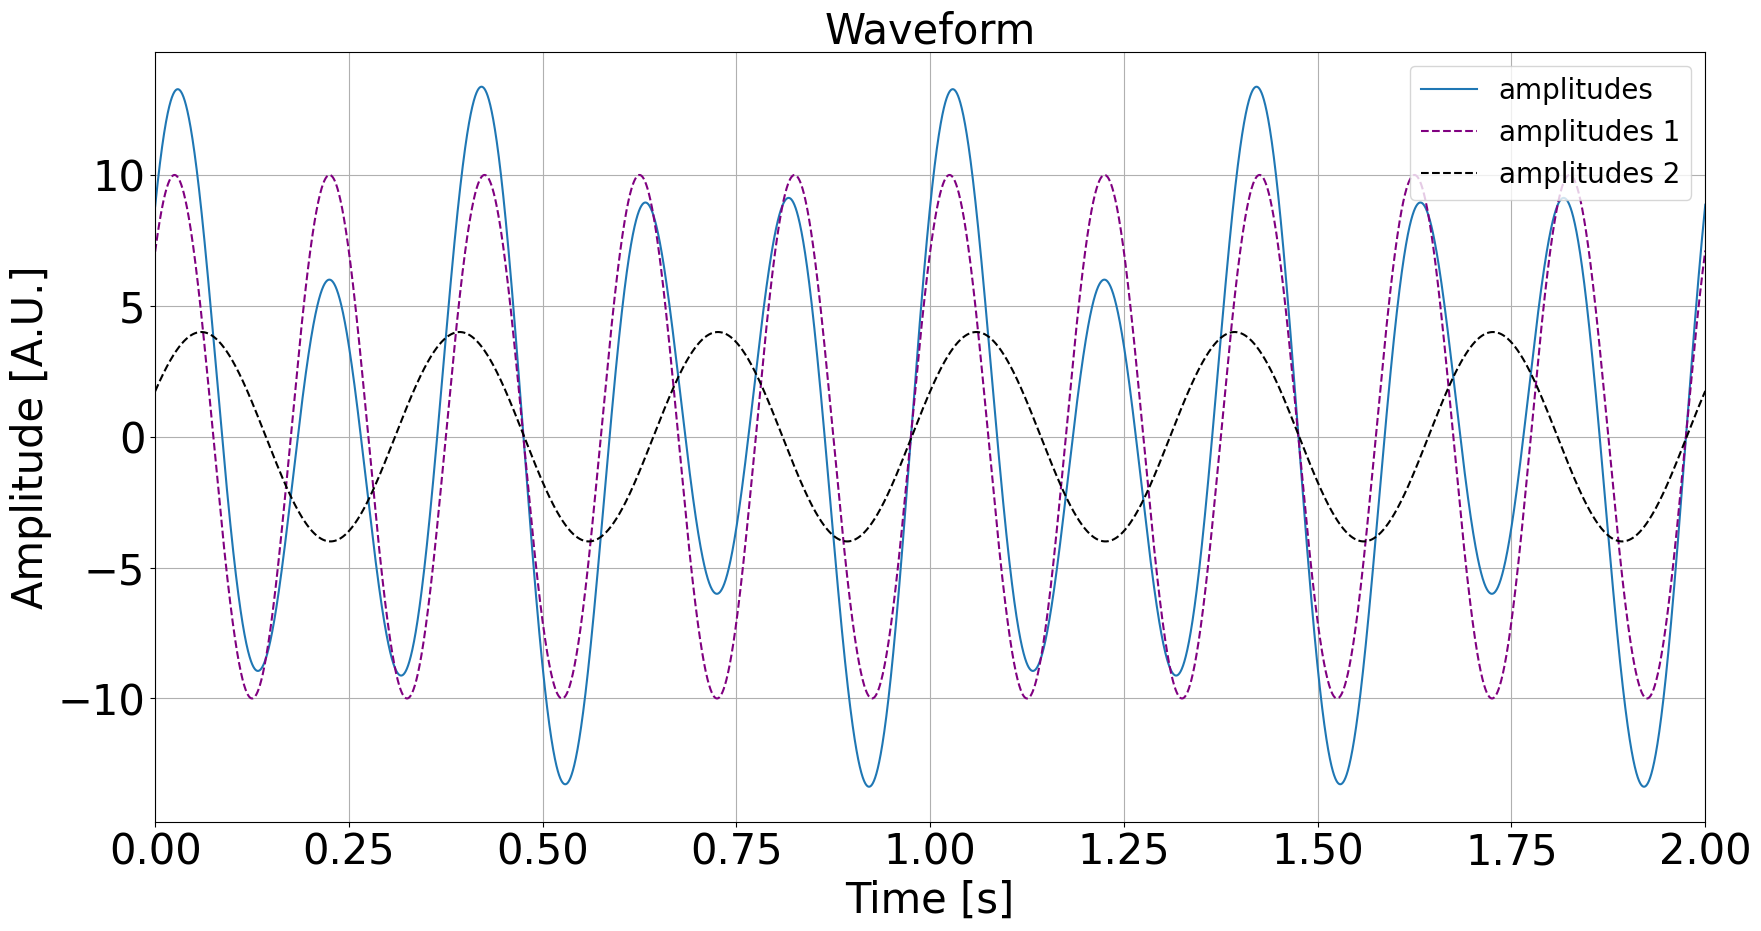

In [3]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes, label = 'amplitudes')
plt.plot(times, amplitudes1, label = 'amplitudes 1', color = 'purple', linestyle = '--')
plt.plot(times, amplitudes2, label = 'amplitudes 2', color = 'black', linestyle = '--')
plt.title('Waveform', fontsize = 30)
plt.xlabel('Time [s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, 2)
plt.legend(loc = 'best', fontsize = 20)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## FFT

In [4]:
freqs = fft.fftfreq(len(times), 1/f_s)
print(f"last freq: {freqs[-1]}") #this should be the half of f_s.
print(f"len(freqs): {len(freqs)}")
print(freqs)

last freq: -0.1
len(freqs): 50000
[ 0.   0.1  0.2 ... -0.3 -0.2 -0.1]


In [5]:
magnitudes = fft.fft(amplitudes) #when i'm filtering, i'm filtering something complex
n = np.max(np.abs(magnitudes))

phases = np.angle(magnitudes)

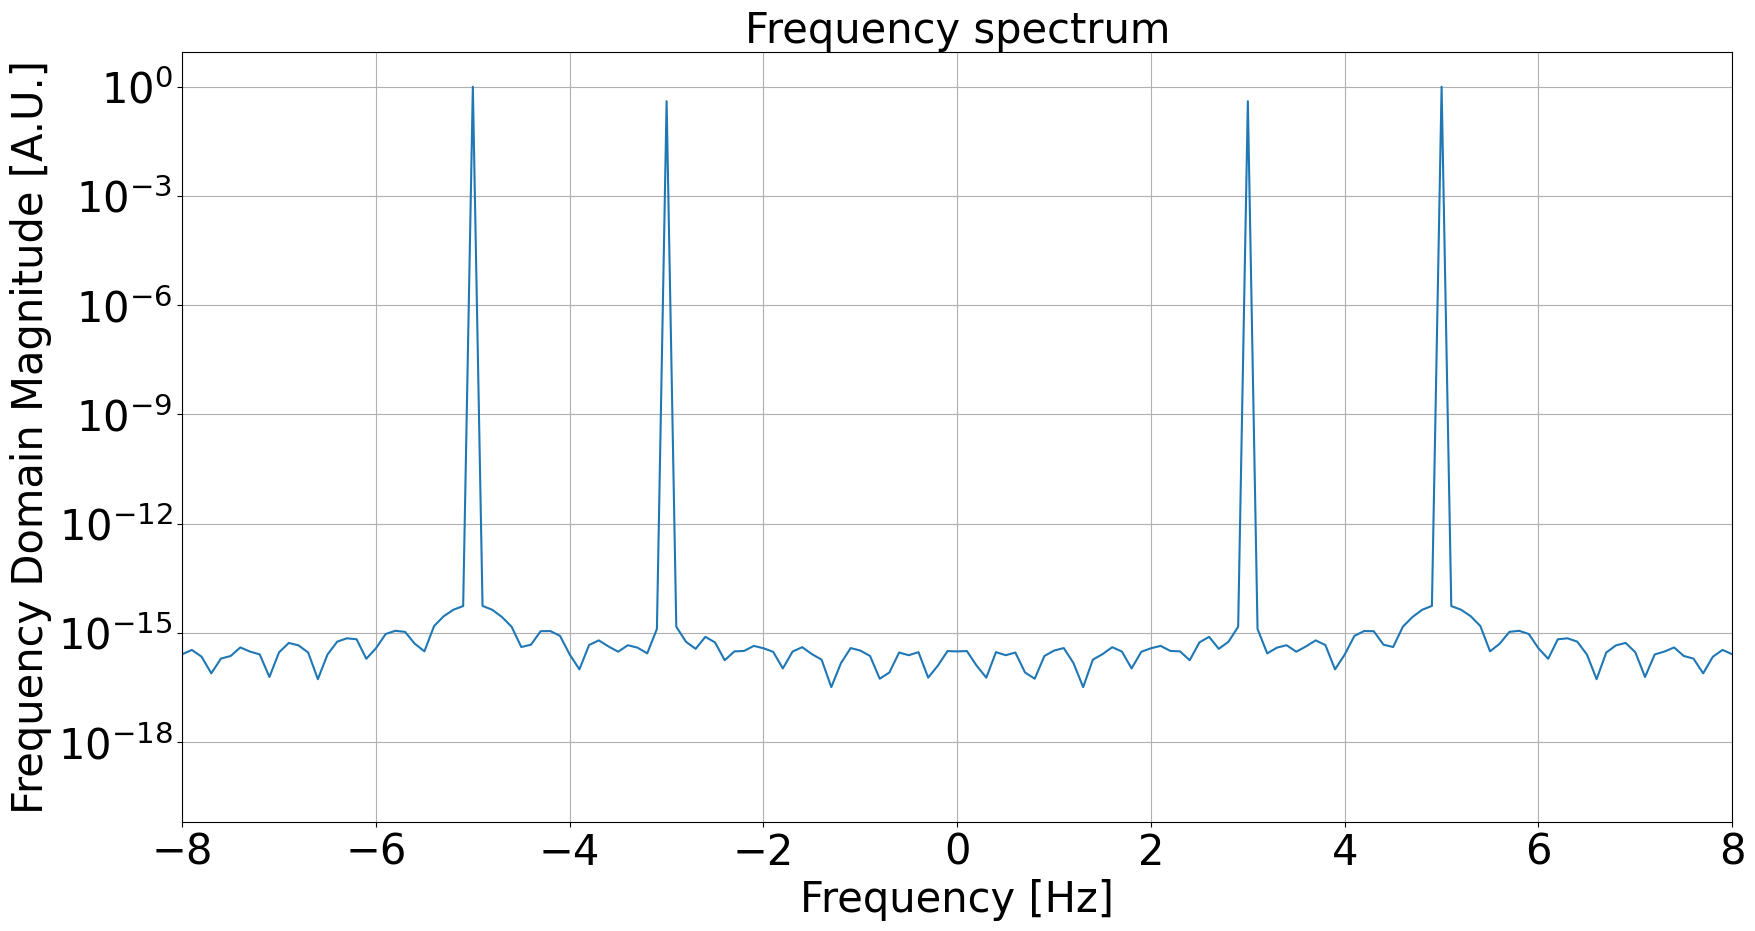

In [6]:
freqs_shifted = fft.fftshift(freqs)
magnitudes_shifted = fft.fftshift(magnitudes)

plt.figure(figsize=(20, 10))
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n)
plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
#plt.xlim(- f_s / 2, f_s / 2) #freq of time sampling
plt.semilogy()
plt.xlim(- 8, 8)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [7]:
if (N%2 == 0):
    pos_freqs = freqs[:round((N/2))]
    pos_magnitudes = magnitudes[:round((N/2))]
    pos_phases = phases[:round((N/2))]
    pos_amplitudes = amplitudes[:round((N/2))]
else:
    pos_freqs = freqs[:round((N-1)/2 + 1)]
    pos_magnitudes = magnitudes[:round((N-1)/2 + 1)]
    pos_phases = phases[:round((N-1)/2 + 1)]
    pos_amplitudes = amplitudes[:round((N-1)/2 + 1)]

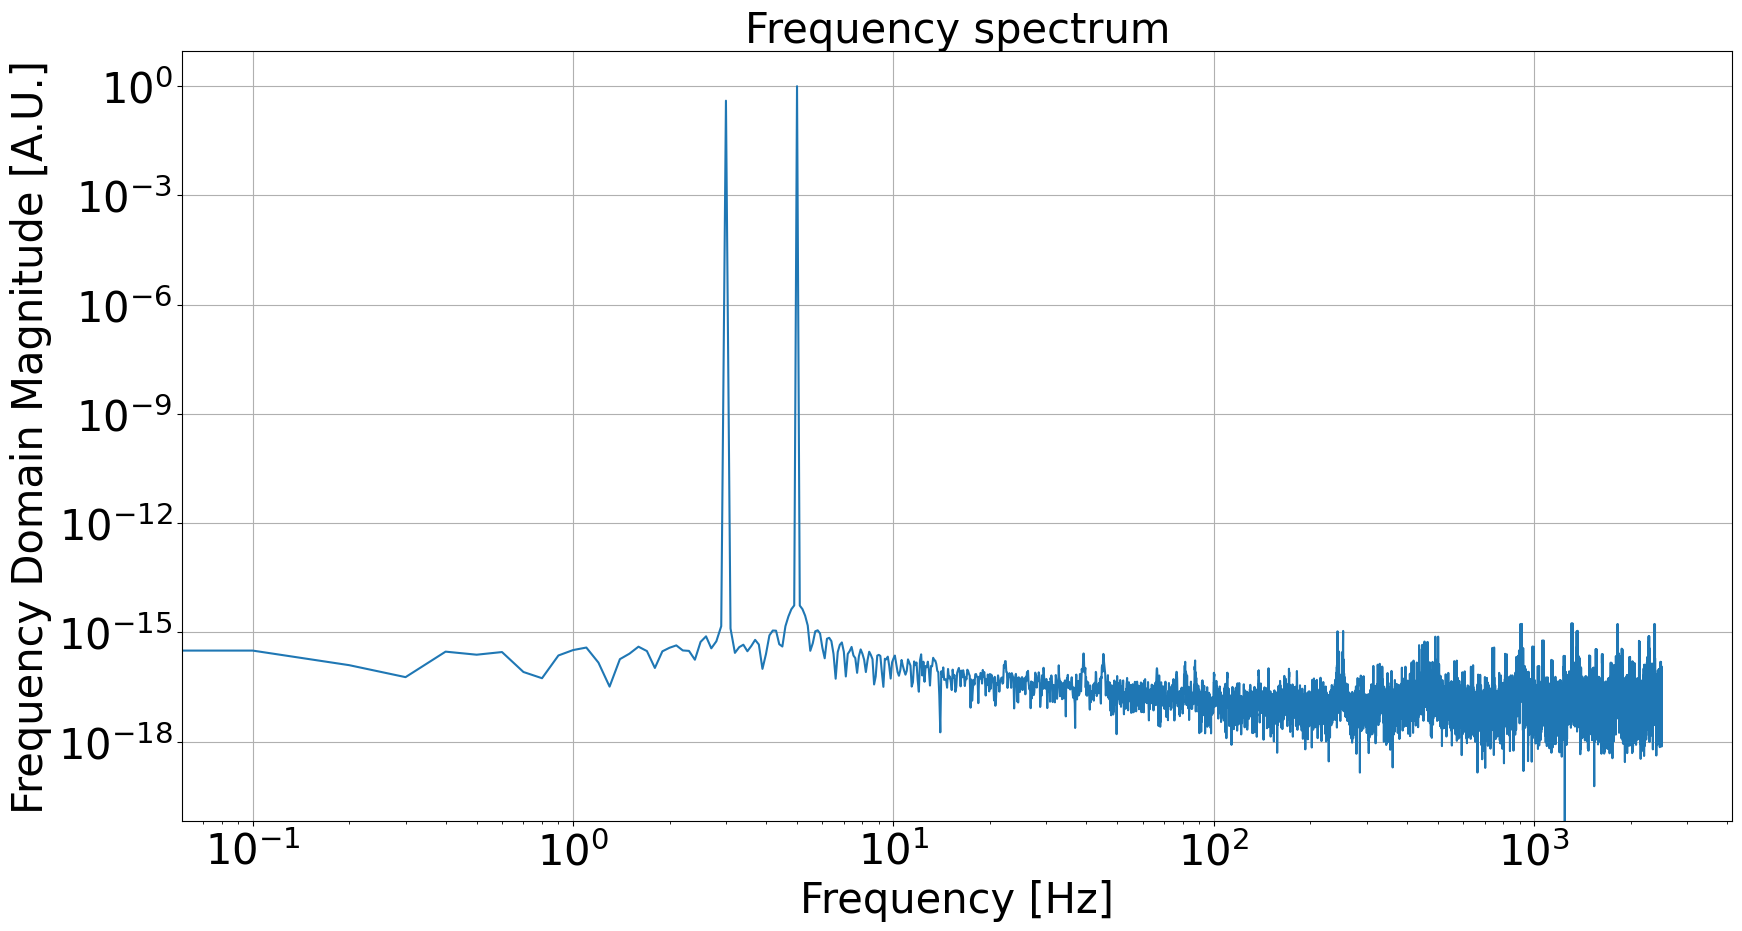

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n)

plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
#plt.xlim(0, f_s / 2) #f_s = freq of time sampling
plt.loglog()
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()


In [9]:
f1 = 2
f2 = 4

## Filtering

In [10]:
filtered_fft, range_avg, peak_f = filtering_func(freqs, magnitudes, f1, f2) #passing the complete spectrum

fft_in_range: [3.77592766e-16 4.38393609e-16 3.18847614e-16 3.09780268e-16
 1.77183293e-16 5.46645240e-16 7.76887039e-16 3.64090688e-16
 5.68401709e-16 1.47598957e-15 4.00000000e-01 1.27934952e-15
 2.73238491e-16 3.91870725e-16 4.57662564e-16 3.03101567e-16
 4.23809826e-16 6.21426913e-16 4.63351014e-16 9.92861170e-17
 2.54063525e-16 2.54063525e-16 9.92861170e-17 4.63351014e-16
 6.21426913e-16 4.23809826e-16 3.03101567e-16 4.57662564e-16
 3.91870725e-16 2.73238491e-16 1.27934952e-15 4.00000000e-01
 1.47598957e-15 5.68401709e-16 3.64090688e-16 7.76887039e-16
 5.46645240e-16 1.77183293e-16 3.09780268e-16 3.18847614e-16
 4.38393609e-16 3.77592766e-16] 
peak_indices: [10 31]
fft[peak_indices]: [0.4 0.4]
peak_f: [ 3. -3.]
range_avg: 4.960486028695392e-16
sum: 2


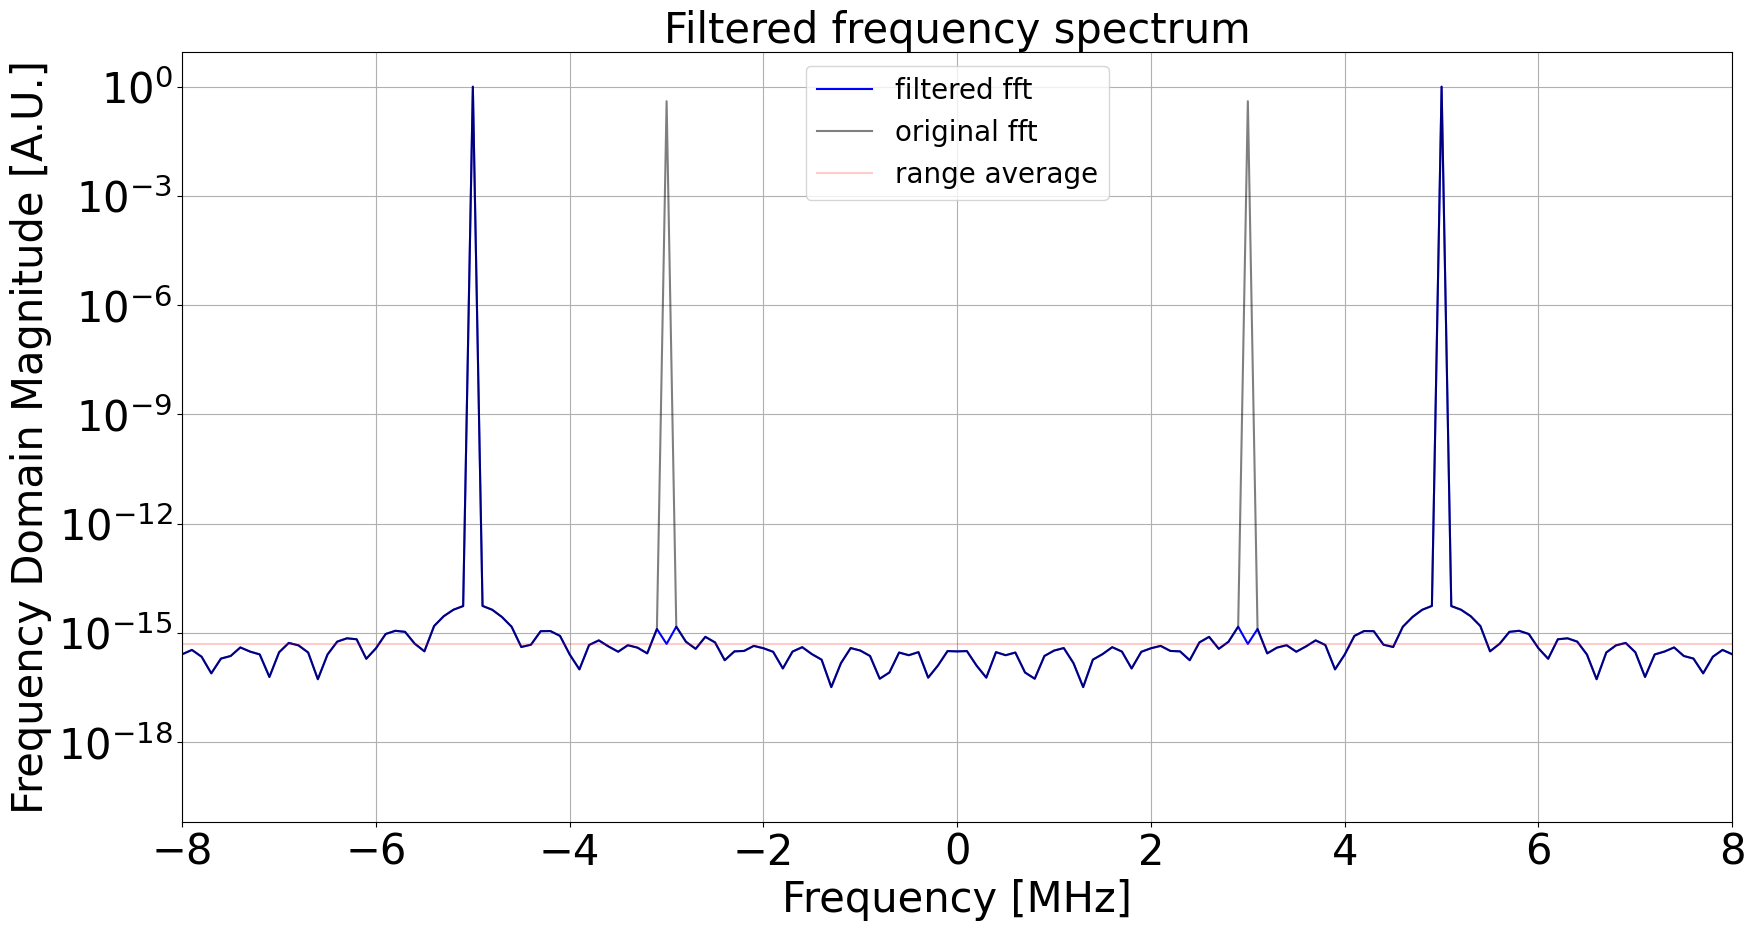

In [11]:
filtered_fft_shifted = fft.fftshift(filtered_fft)

plt.figure(figsize=(20, 10))
plt.plot(freqs_shifted, np.abs(filtered_fft_shifted)/n, color = 'blue', label = 'filtered fft')
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n, alpha = 0.5, color = 'k', label = 'original fft')
plt.axhline(4.960486028695392e-16, color = 'red', alpha = 0.2, label = 'range average')

plt.title('Filtered frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(-f2*2, f2*2)
plt.semilogy()
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()


In [12]:
if (N%2 == 0):
    pos_filtered_fft = filtered_fft[:round((N/2))]
else:
    pos_filtered_fft = filtered_fft[:round((N-1)/2 + 1)]

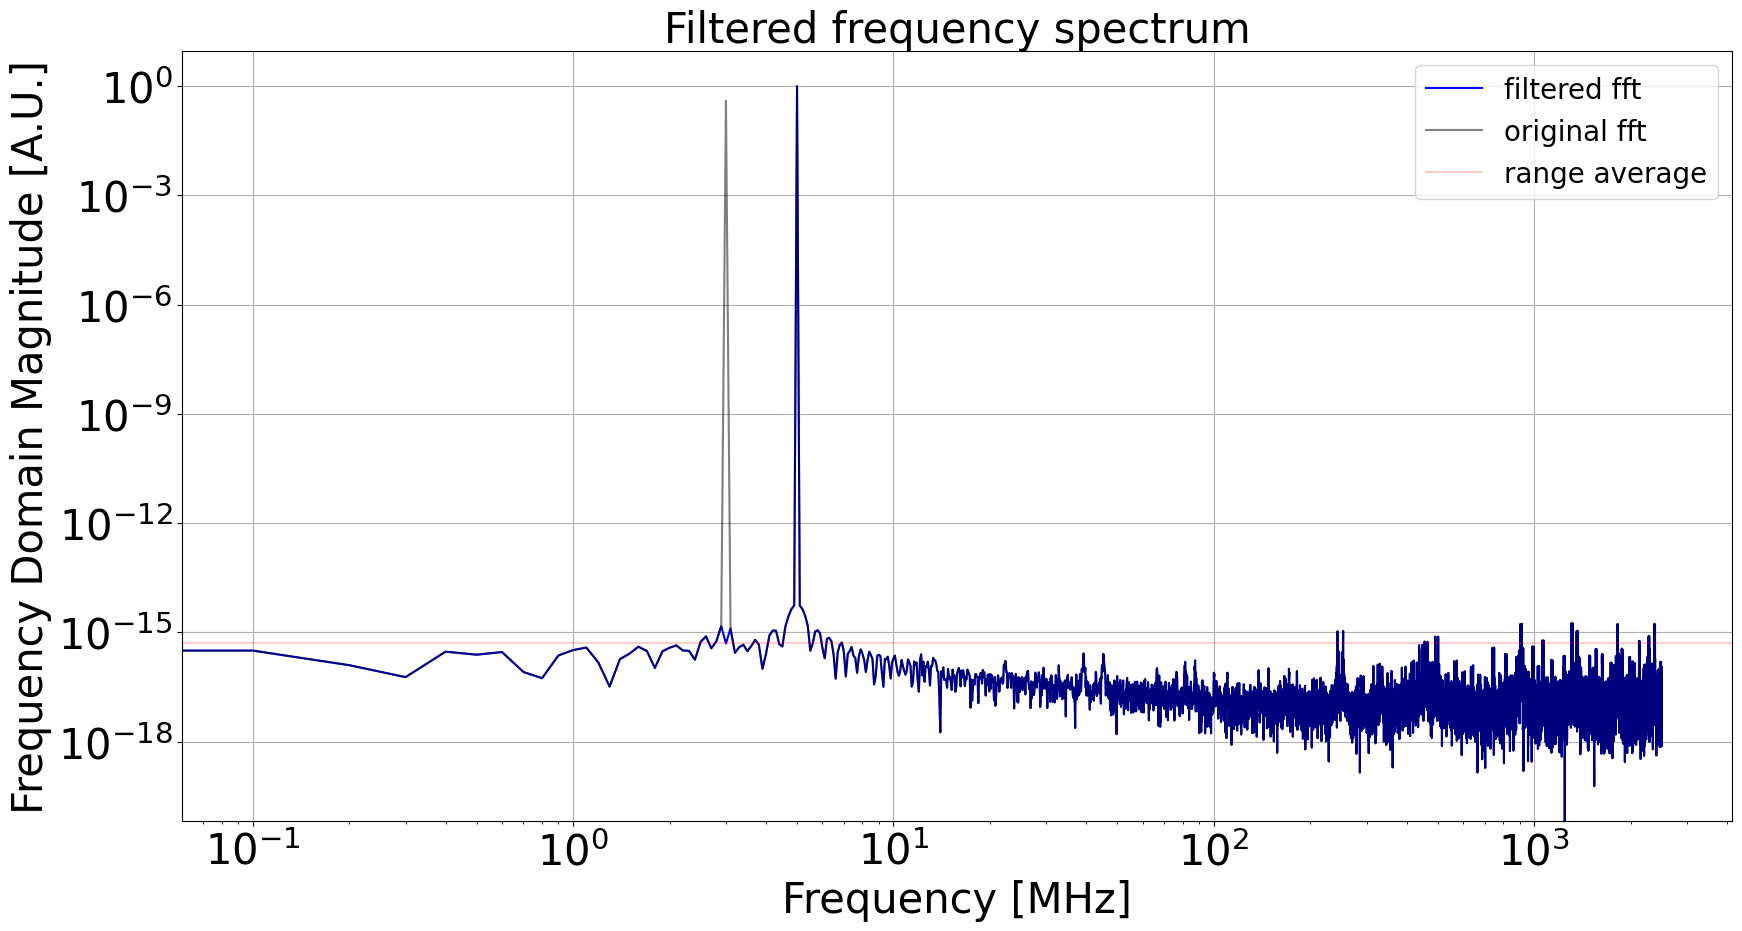

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(pos_freqs, np.abs(pos_filtered_fft)/n, color = 'blue', label = 'filtered fft')
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n, alpha = 0.5, color = 'k', label = 'original fft')
plt.axhline(range_avg, color = 'red', alpha = 0.2, label = 'range average')

plt.title('Filtered frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.legend(loc = 'best', fontsize = 20)
plt.loglog()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [14]:
reconstructed_amplitudes = fft.ifft(magnitudes)

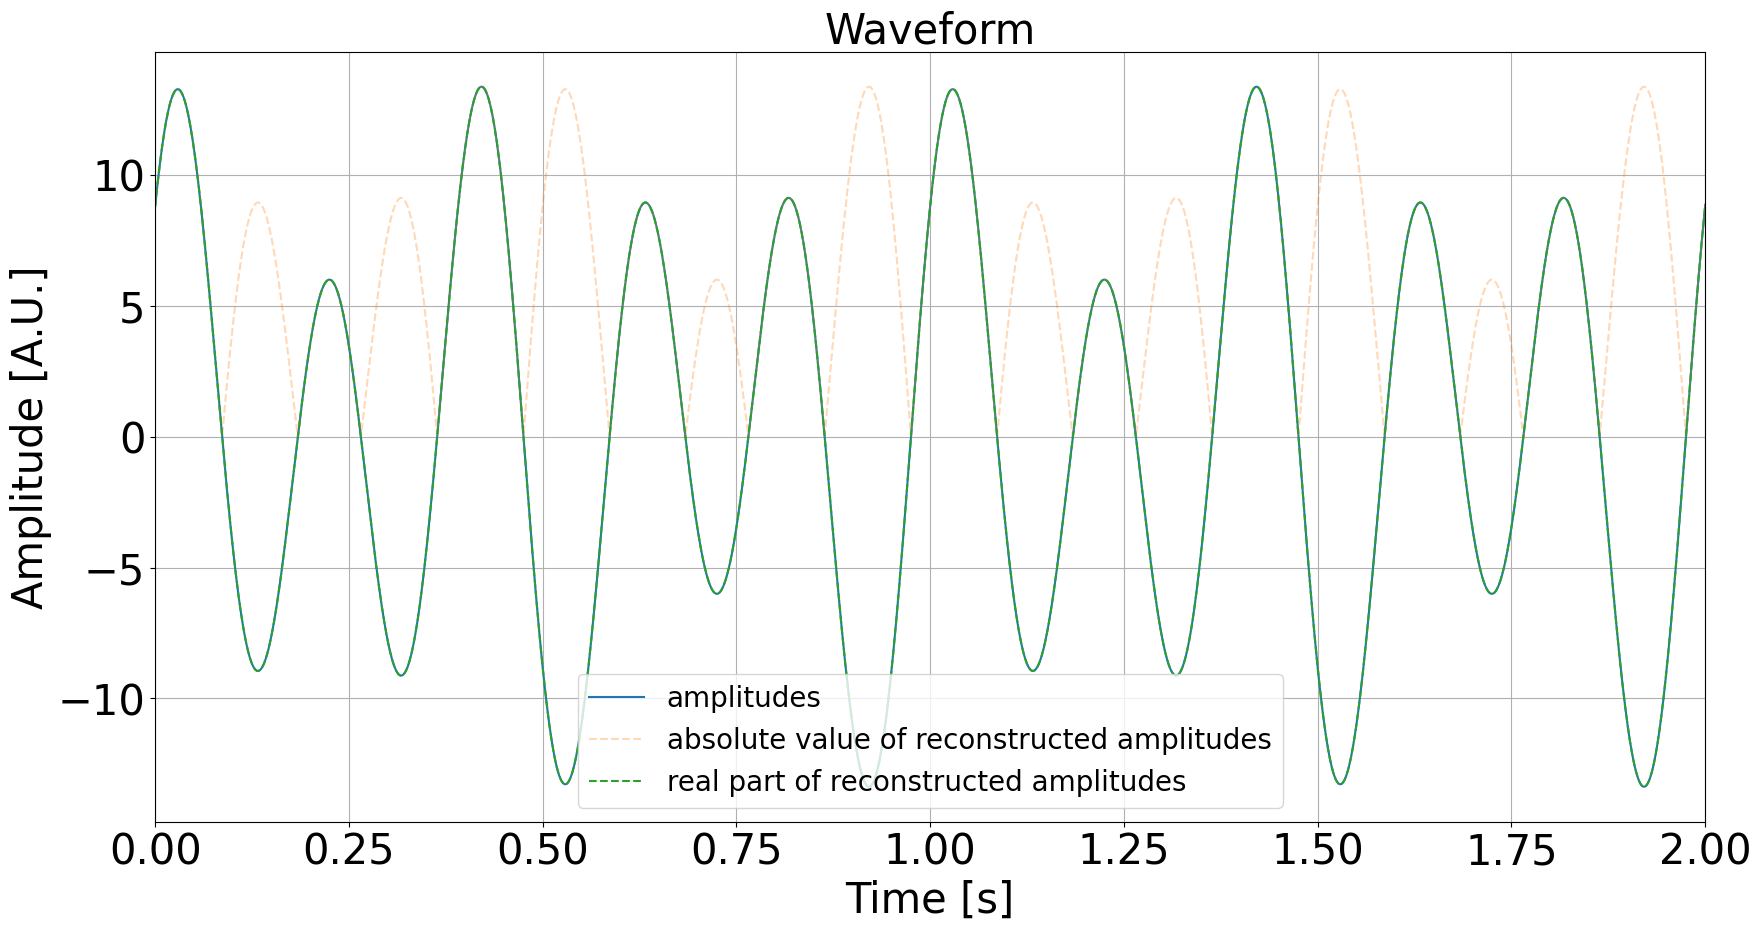

In [15]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes, label = 'amplitudes')
plt.plot(times, np.abs(reconstructed_amplitudes), label = 'absolute value of reconstructed amplitudes', linestyle = '--', alpha = 0.3)
plt.plot(times, reconstructed_amplitudes.real, label = 'real part of reconstructed amplitudes', linestyle = '--')

plt.title('Waveform', fontsize = 30)
plt.xlabel('Time [s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, 2)
plt.legend(loc = 'best', fontsize = 20)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## IFFT

In [25]:
#times_ifft = np.arange(N) / f_s #it's right but it's the SAME as times
filtered_amplitudes = fft.ifft(np.abs(filtered_fft)) #complex numbers, whole spectrum IF i put real or abs() here i break the phase info!!

## Compare to original waveform

In [26]:
reconstructed_wf = fft.ifft(magnitudes) #complex numbers, whole spectrum IF i put real or abs() here i break the phase info!!

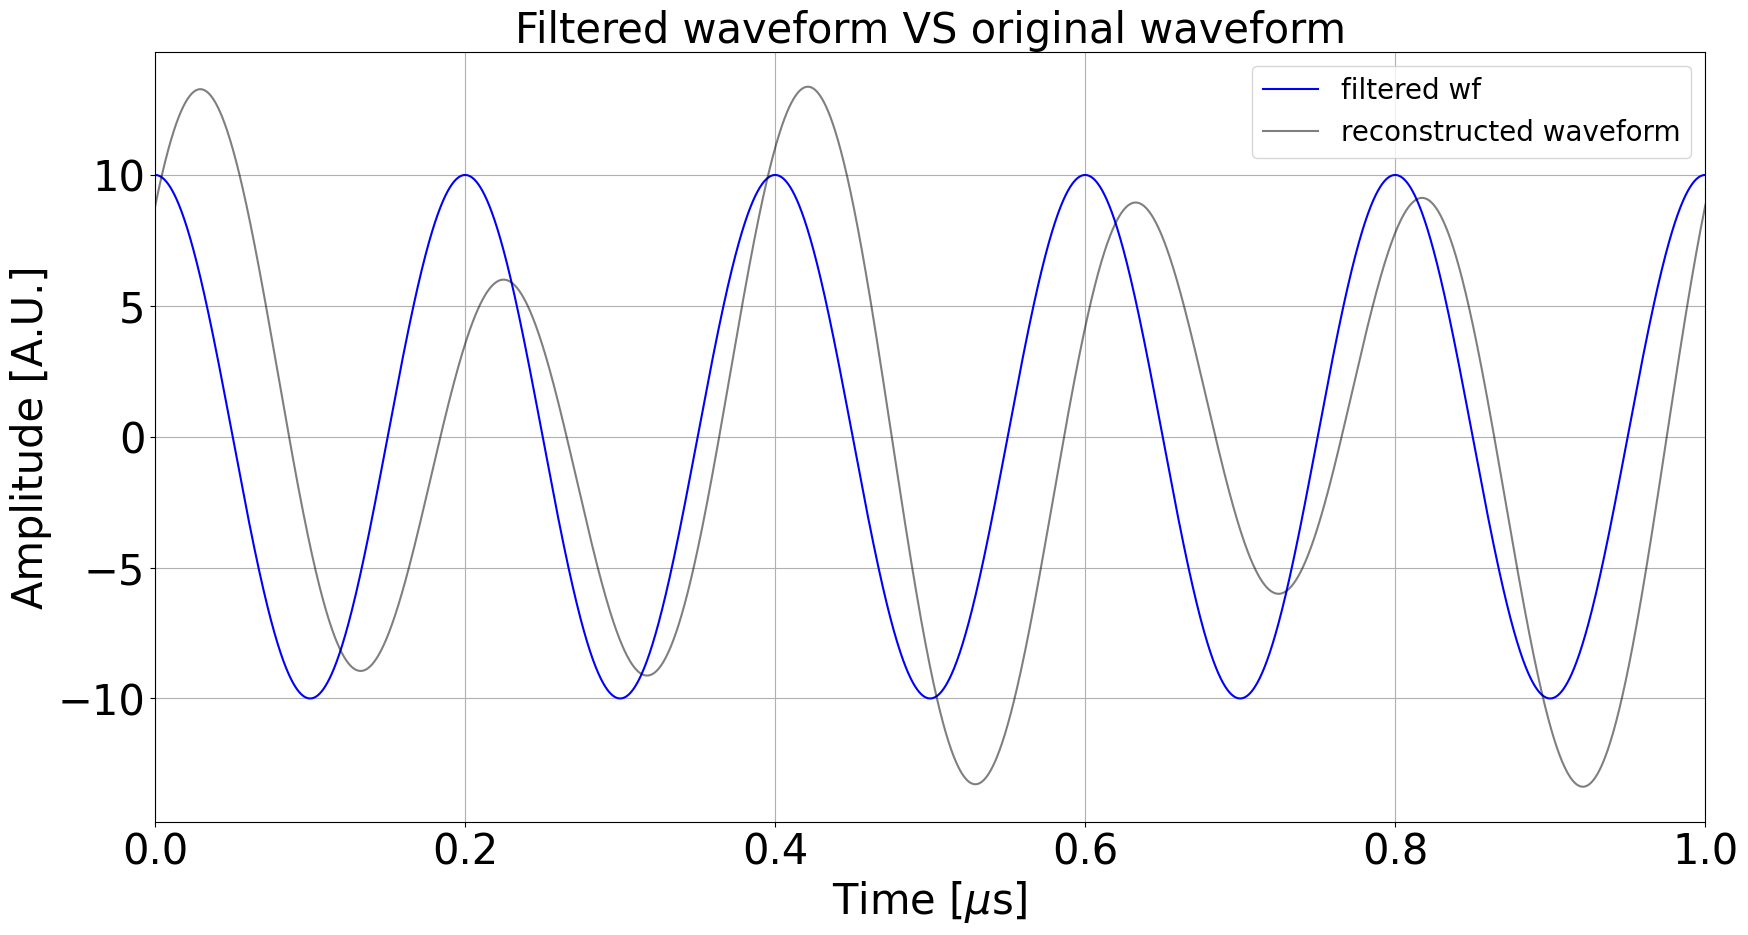

In [27]:
plt.figure(figsize = (20, 10))
plt.plot(times, filtered_amplitudes.real, label = 'filtered wf', color = 'blue') #why real?
plt.plot(times, reconstructed_wf.real, label = 'reconstructed waveform', color = 'k', alpha = 0.5)

plt.title('Filtered waveform VS original waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [28]:
noise_wf = reconstructed_wf - filtered_amplitudes

In [29]:
A = max(noise_wf.real)
phi = phases[freqs == peak_f[0]]
f = peak_f[0]
coswave = A*np.cos(f * 2*np.pi*times + phi)

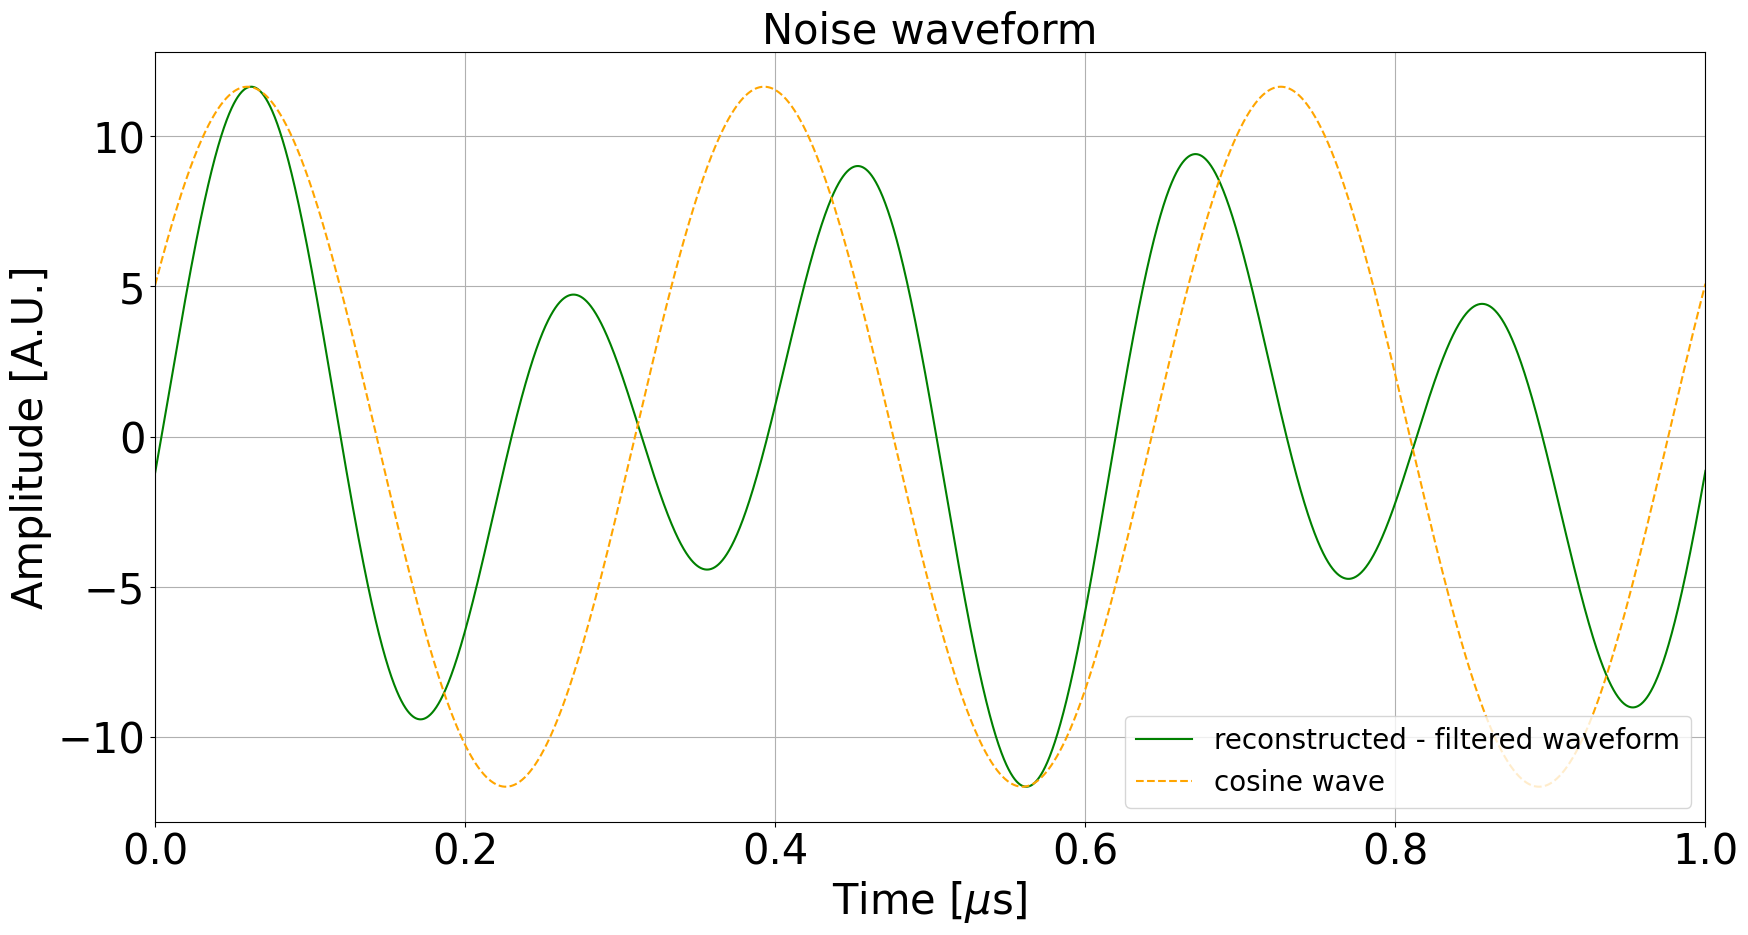

In [34]:
plt.figure(figsize = (20, 10))
plt.plot(times, noise_wf.real, label = 'reconstructed - filtered waveform', color = 'green')
plt.plot(times, coswave, label = 'cosine wave', color = 'orange', linestyle = '--')

plt.title('Noise waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("../Results/simple_input/messed_up_phase.pdf", format = "pdf", bbox_inches="tight")
plt.show()

# Make sure reconstructed waveform and original waveform are the same

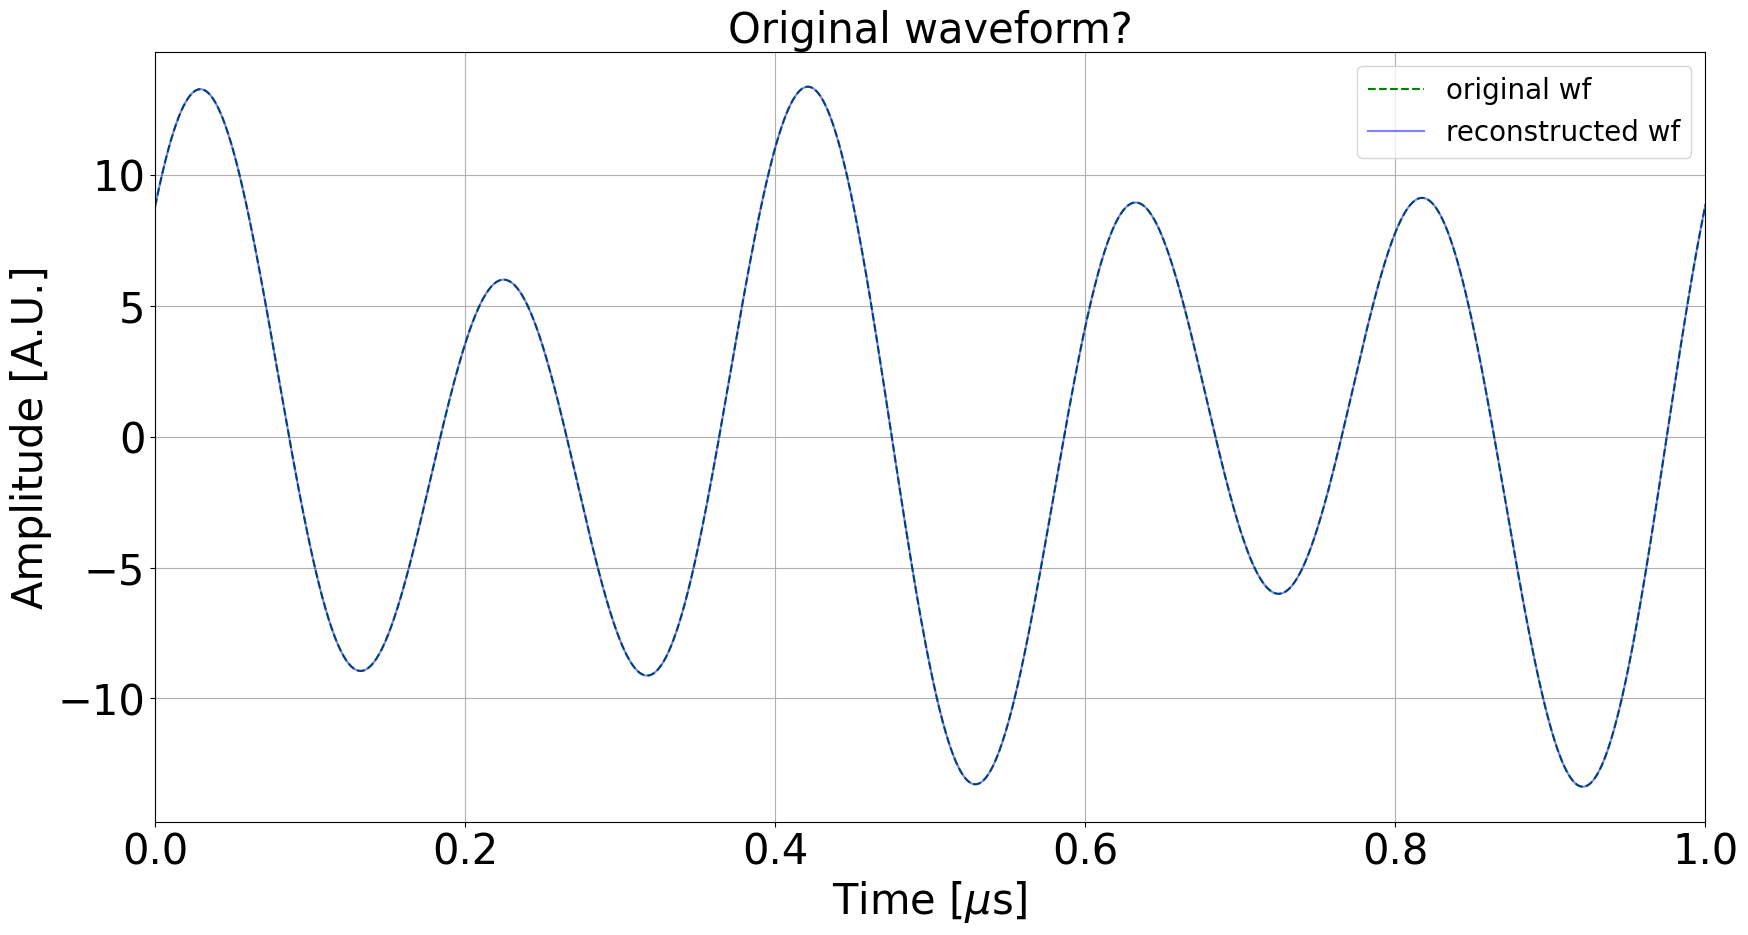

In [22]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes, label = 'original wf', color = 'green', linestyle = '--')
plt.plot(times, reconstructed_wf.real, label = 'reconstructed wf', color = 'blue', alpha = 0.5)

plt.title('Original waveform?', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

# Plot reconstructed fft

In [23]:
reconstructed_filtered_fft = fft.fft(filtered_amplitudes)

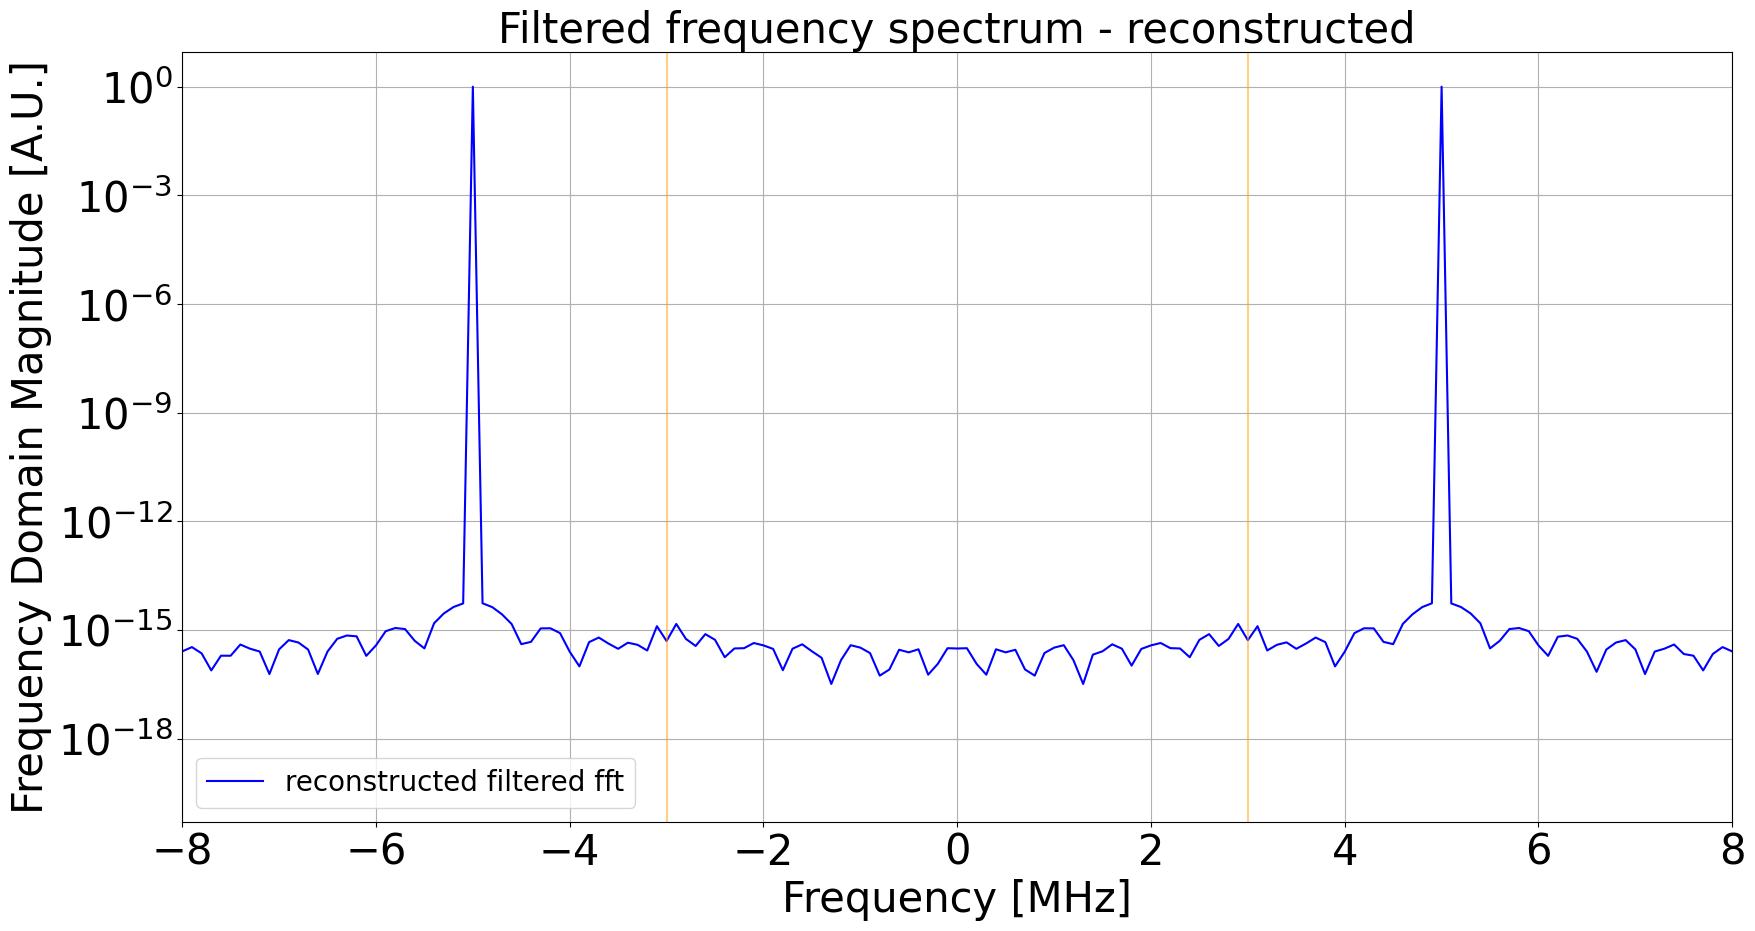

In [24]:
reconstructed_filtered_fft_shifted = fft.fftshift(reconstructed_filtered_fft)

plt.figure(figsize=(20, 10))
plt.plot(freqs_shifted, np.abs(reconstructed_filtered_fft_shifted)/n, color = 'blue', label = 'reconstructed filtered fft')
plt.axvline(peak_f[0], color = 'orange', alpha = 0.5)
plt.axvline(peak_f[1], color = 'orange', alpha = 0.5)

plt.title('Filtered frequency spectrum - reconstructed', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(-f2*2, f2*2)
plt.legend(loc = 'best', fontsize = 20)
plt.semilogy()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()